## Acquisition: 
Although we are providing the location of the dataset, you need to research how the data was assembled.

1.	File: Look at source 
2.	Source: Download the latest version from: https://www.kaggle.com/Cornell-University/arxiv  (This is a large json file ~2.81 GB). To deal with json files in python, please refer to the working JSON tutorial. 


In [66]:
import json
import pandas as pd
import seaborn as sns

#reading in json file
data = (line for line in open(r'arxiv-metadata-oai-snapshot.json'))

#columns for dataframe
titles = []
ids = []
comments = []
journal_refs = []
categories = []

#extracting each item from the json and getting required info
for paper in data:
    papers = json.loads(paper)
    titles.append(papers.get('title'))
    ids.append(papers.get('id'))
    comments.append(papers.get('comments'))
    journal_refs.append(papers.get('journal-ref'))
    categories.append(papers.get('categories'))

#assembling into dataframe
paper_df = pd.DataFrame({
    'titles' : titles,
    'ids': ids,
    'comments': comments,
    'journal_refs': journal_refs,
    'categories': categories
})

paper_df.head()


,titles,ids,comments,journal_refs,categories
0,Calculation of prompt diphoton production cros...,0704.0001,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,Sparsity-certifying Graph Decompositions,0704.0002,To appear in Graphs and Combinatorics,None,math.CO cs.CG
2,The evolution of the Earth-Moon system based o...,0704.0003,"23 pages, 3 figures",None,physics.gen-ph
3,A determinant of Stirling cycle numbers counts...,0704.0004,11 pages,None,math.CO
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,0704.0005,None,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA


## Data Wrangling: 

Follow the recommendations from the lectures and the Tutorial. You must generate a clean version of the dataset. 

Create a new dataset in csv format with only records containing comments and without the word COVID in the title. This new dataset will have only 5 columns: id, title, comments, journal-ref and categories

In [67]:
paper_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068280 entries, 0 to 2068279
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   titles        2068280 non-null  object
 1   ids           2068280 non-null  object
 2   comments      1605378 non-null  object
 3   journal_refs  762628 non-null   object
 4   categories    2068280 non-null  object
dtypes: object(5)
memory usage: 78.9+ MB


In [68]:
print('Number of rows containing no comments:', len(paper_df.loc[paper_df['comments'].isna() == True]))
print('Number of rows containing \'COVID\' in the title:', len(paper_df.loc[paper_df['titles'].str.contains('COVID') == True]))

#removing rows where COVID in title or where there are no comments
paper_df_clean = paper_df.loc[paper_df['comments'].isna() == False]
paper_df_clean = paper_df_clean.loc[paper_df_clean['titles'].str.contains('COVID') == False]

paper_df_clean.info(show_counts = True)

Number of rows containing no comments: 462902
Number of rows containing 'COVID' in the title: 3327
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603499 entries, 0 to 2068279
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   titles        1603499 non-null  object
 1   ids           1603499 non-null  object
 2   comments      1603499 non-null  object
 3   journal_refs  651532 non-null   object
 4   categories    1603499 non-null  object
dtypes: object(5)
memory usage: 73.4+ MB


In [69]:
paper_df_clean['ids'].value_counts()

math-ph/0207039     2
math-ph/0212014     2
math-ph/0408005     2
math-ph/0409039     2
2102.10745          1
                   ..
1509.03542          1
1509.03540          1
1509.03539          1
1509.03538          1
supr-con/9609004    1
Name: ids, Length: 1603495, dtype: int64

In [70]:
#dropping duplicates
paper_df_clean = paper_df_clean.drop_duplicates()

In [71]:
# investigating the duplicated ids

paper_df_clean.loc[paper_df_clean['ids'] == 'math-ph/0212014']

#paper_df_clean.loc[paper_df_clean['ids'] == 'math-ph/0409039']

#paper_df_clean.loc[paper_df_clean['ids'] == 'math-ph/0408005']

,titles,ids,comments,journal_refs,categories
1951930,A semiclassically entangled puzzle,math-ph/0212014,"Letter, 5 pages","J. Phys. A, 40 (2007) F1047-F1052 [revised ver...",math-ph math.MP quant-ph
2005183,A semiclassically entangled puzzle,math-ph/0212014,"Letter, 5 pages","J. Phys. A, 40 (2007) F1047-F1052",math-ph math.MP math.SG quant-ph


In [72]:
#dropping duplicated id rows
paper_df_clean.drop(index = [1953232, 1953327, 1951930], inplace=True)
paper_df_clean

,titles,ids,comments,journal_refs,categories
0,Calculation of prompt diphoton production cros...,0704.0001,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,Sparsity-certifying Graph Decompositions,0704.0002,To appear in Graphs and Combinatorics,None,math.CO cs.CG
2,The evolution of the Earth-Moon system based o...,0704.0003,"23 pages, 3 figures",None,physics.gen-ph
3,A determinant of Stirling cycle numbers counts...,0704.0004,11 pages,None,math.CO
5,Bosonic characters of atomic Cooper pairs acro...,0704.0006,"6 pages, 4 figures, accepted by PRA",None,cond-mat.mes-hall
...,...,...,...,...,...
2068275,On the origin of the irreversibility line in t...,supr-con/9608008,"19 pages, LaTex, 6 PostScript figures; Author'...",None,supr-con cond-mat.supr-con
2068276,Nonlinear Response of HTSC Thin Film Microwave...,supr-con/9609001,"4 pages, LaTeX type, Uses IEEE style files, 60...",None,supr-con cond-mat.supr-con
2068277,Critical State Flux Penetration and Linear Mic...,supr-con/9609002,"20 pages, LaTeX type, Uses REVTeX style files,...",None,supr-con cond-mat.supr-con
2068278,Density of States and NMR Relaxation Rate in A...,supr-con/9609003,"7 pages, 4 PostScript Figures, LaTeX, to appea...",None,supr-con cond-mat.supr-con


In [73]:
paper_df_clean['categories'].nunique()

58740

In [74]:
#transforming df so it is one category per row
paper_df_clean = paper_df_clean.assign(cat_split=paper_df_clean['categories'].str.split(' ')).explode('cat_split')

#creating parent category column by splitting on full stop delimiter
paper_df_clean['parent_cat'] = paper_df_clean['cat_split'].str.split('.').str[0]

paper_df_clean['parent_cat'].nunique()

38

In [75]:
paper_df_clean.to_csv('new datatset.csv')

In [76]:
paper_df_clean.head()

,titles,ids,comments,journal_refs,categories,cat_split,parent_cat
0,Calculation of prompt diphoton production cros...,0704.0001,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,hep-ph,hep-ph
1,Sparsity-certifying Graph Decompositions,0704.0002,To appear in Graphs and Combinatorics,None,math.CO cs.CG,math.CO,math
1,Sparsity-certifying Graph Decompositions,0704.0002,To appear in Graphs and Combinatorics,None,math.CO cs.CG,cs.CG,cs
2,The evolution of the Earth-Moon system based o...,0704.0003,"23 pages, 3 figures",None,physics.gen-ph,physics.gen-ph,physics
3,A determinant of Stirling cycle numbers counts...,0704.0004,11 pages,None,math.CO,math.CO,math


## Descriptive analysis: 
You are expected to fully describe your data as we did in the tutorials. Remember that you are answering what happened question. Please provide appropriate visualisations according to the data you are describing. You must include, as a minimum, a histogram and a scatter or density plot.           

Text(0.5, 1.0, 'Count of Papers per Category')

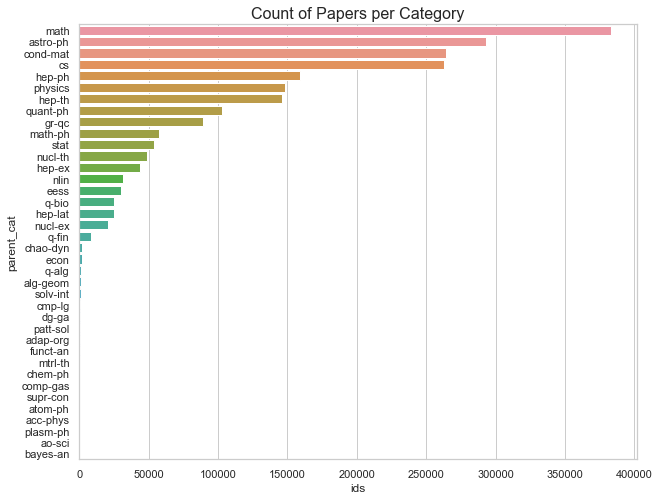

In [77]:
#visualising the count of papers per category

paper_df_clean = paper_df_clean[['titles', 'ids', 'comments', 'journal_refs', 'parent_cat']].drop_duplicates()

sns.set(rc = {'figure.figsize':(10,8)}, style = 'whitegrid')
ax = sns.barplot(y = 'parent_cat', 
                x = 'ids', 
                data = paper_df_clean.groupby(by = ['parent_cat']).agg({'ids': 'size'}).reset_index().sort_values('ids', ascending = False))
ax.set_title('Count of Papers per Category', size=16)

Text(0.5, 1.0, 'Count of Papers per Journal')

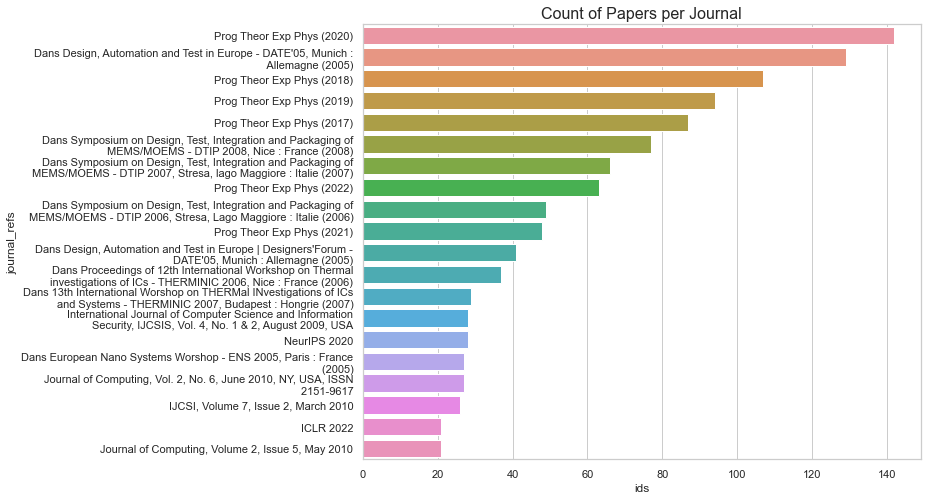

In [78]:
#visualising the count of papers per journal 

sns.set(rc = {'figure.figsize':(10,8)}, style = 'whitegrid')
ax = sns.barplot(y = 'journal_refs', 
                x = 'ids', 
                data = paper_df_clean.groupby(by = ['journal_refs']).agg({'ids': 'size'}).reset_index().sort_values('ids', ascending = False).head(20))
ax.set_title('Count of Papers per Journal', size=16)

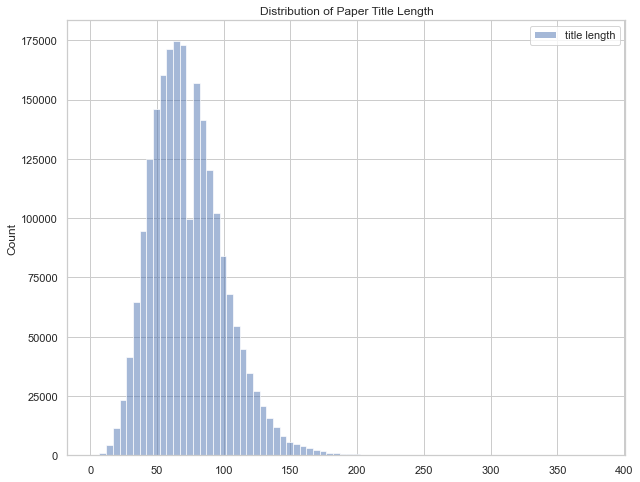

In [79]:
# distribution plot of the length of paper titles

paper_df_clean['title length'] = paper_df_clean['titles'].apply(len)
ax = sns.histplot(data=paper_df_clean[['title length']], binwidth=5)
ax.set_title('Distribution of Paper Title Length' , size=12);

Using this new dataset, report if there is a relation between journal-ref and categories; construct a ranking for all the words in the titles. 

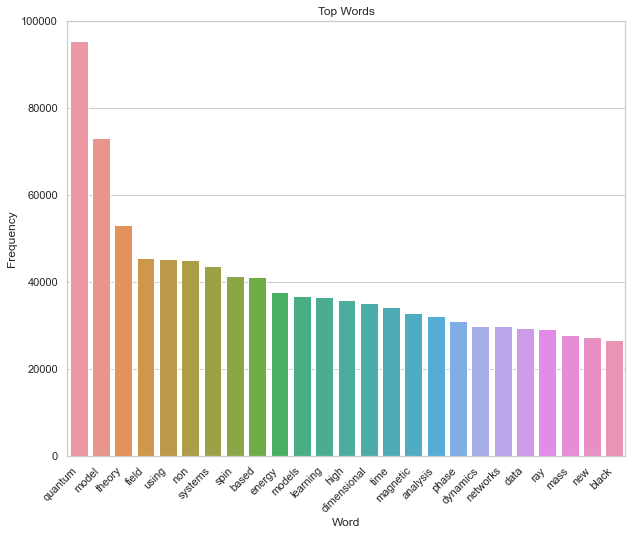

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

#getting most common words as a list
def get_top_words(df,n=None):
    vec = CountVectorizer(stop_words='english').fit(df)
    sum_words = vec.transform(df).sum(axis=0)
    word_freq = [(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
    word_freq = sorted(word_freq,key=lambda x:x[1],reverse=True)

    return word_freq[:n]

common_words = get_top_words(paper_df_clean['titles'].drop_duplicates(),25)

#creating dataframe of common words
df_ngram = pd.DataFrame(common_words,columns=['Word','Frequency'])
df_ngram = df_ngram.groupby('Word').sum()['Frequency'].sort_values(ascending=False).reset_index()

#plotting most common words
ax = sns.barplot(x = 'Word',y='Frequency',data=df_ngram,ci = None)

ax.set_xticklabels(labels=df_ngram['Word'], rotation=45, ha='right')
ax.set_title('Top Words',size=12);
plt.show()

In [81]:
## chi squared test
## for just top 20 journals

top_journals = paper_df_clean['journal_refs'].value_counts()[:20].index.tolist()

top_journal_df = paper_df_clean[paper_df_clean["journal_refs"].isin(top_journals)]
top_journal_df= top_journal_df[['titles', 'ids', 'comments', 'journal_refs', 'parent_cat']].drop_duplicates()

data_crosstab = pd.crosstab(top_journal_df['parent_cat'],
                            top_journal_df['journal_refs'],
                           margins=True, margins_name="Total")
data_crosstab

journal_refs,"Dans 13th International Worshop on THERMal INvestigations of ICs\n and Systems - THERMINIC 2007, Budapest : Hongrie (2007)","Dans Design, Automation and Test in Europe - DATE'05, Munich :\n Allemagne (2005)","Dans Design, Automation and Test in Europe | Designers'Forum -\n DATE'05, Munich : Allemagne (2005)","Dans European Nano Systems Worshop - ENS 2005, Paris : France\n (2005)","Dans Proceedings of 12th International Workshop on Thermal\n investigations of ICs - THERMINIC 2006, Nice : France (2006)","Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2006, Stresa, Lago Maggiore : Italie (2006)","Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2007, Stresa, lago Maggiore : Italie (2007)","Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2008, Nice : France (2008)",ICLR 2022,"IJCSI, Volume 7, Issue 2, March 2010",...,"Journal of Computing, Vol. 2, No. 6, June 2010, NY, USA, ISSN\n 2151-9617","Journal of Computing, Volume 2, Issue 5, May 2010",NeurIPS 2020,Prog Theor Exp Phys (2017),Prog Theor Exp Phys (2018),Prog Theor Exp Phys (2019),Prog Theor Exp Phys (2020),Prog Theor Exp Phys (2021),Prog Theor Exp Phys (2022),Total
parent_cat,,,,,,,,,,,,,,,,,,,,,
astro-ph,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3,0,1,1,5,12
cond-mat,0,0,0,21,37,0,0,0,0,0,...,0,0,1,2,4,1,5,3,7,81
cs,0,127,41,1,0,49,66,77,14,26,...,27,21,14,0,0,0,0,0,0,489
eess,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2
gr-qc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,6,6,8,4,6,32
hep-ex,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,5,3,8,5,3,30
hep-lat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,12,12,12,5,5,56
hep-ph,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,23,29,45,8,17,142
hep-th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,36,38,31,39,18,15,177


In [82]:
from scipy.stats import chi2_contingency
  
stat, p, dof, expected = chi2_contingency(data_crosstab)

print("p-value is " + str(p))

p-value is 0.0


## Diagnostic analysis: 

Here you should try to answer the why question. For this point, a regression analysis (based on a scatter plot for example) would be sufficient. As before, you must support your analysis with the adequate plots. 

Based on the ranking of words, pick the top ten and recommend a journal for each word. For example, if the top word is “human”, you should rank journals in terms of articles with “human” in the title and then pick the one at the top. 

In [83]:
top_words = ['quantum', 'model', 'theory', 'field', 'systems', 'energy', 'learning', 'spin', 'time', 'dimensional']

#only selecting titles and refs and dropping duplicates to remove influence 
#of articles with muliple categories
titles_and_refs = paper_df_clean[["journal_refs", 'titles', 'ids']].drop_duplicates()

for word in top_words:
    filtered_df = titles_and_refs.loc[titles_and_refs['titles'].str.contains(word) == True]
    filtered_df = filtered_df.groupby('journal_refs').agg({'ids':'size'}).sort_values(by = 'ids', ascending=False).reset_index()
    top_journal = filtered_df.iloc[0,0]
    print("Top Journal for Papers Containing '{}' is:".format(word), top_journal)


Top Journal for Papers Containing 'quantum' is: Phys. Rev. A 93, 052105 (2016)
Top Journal for Papers Containing 'model' is: Prog Theor Exp Phys (2020)
Top Journal for Papers Containing 'theory' is: Prog Theor Exp Phys (2018)
Top Journal for Papers Containing 'field' is: Prog Theor Exp Phys (2018)
Top Journal for Papers Containing 'systems' is: Phys. Rev. A 93, 032121 (2016)
Top Journal for Papers Containing 'energy' is: Prog Theor Exp Phys (2022)
Top Journal for Papers Containing 'learning' is: ACS Photonics (2021)
Top Journal for Papers Containing 'spin' is: Prog Theor Exp Phys (2019)
Top Journal for Papers Containing 'time' is: Prog Theor Exp Phys (2020)
Top Journal for Papers Containing 'dimensional' is: J. Phys.: Condens. Matter 20(29) 293202/1-42 (2008)


## Action: 

You need to provide a sensible recommendation based only on the assigned task and your analysis.	